# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

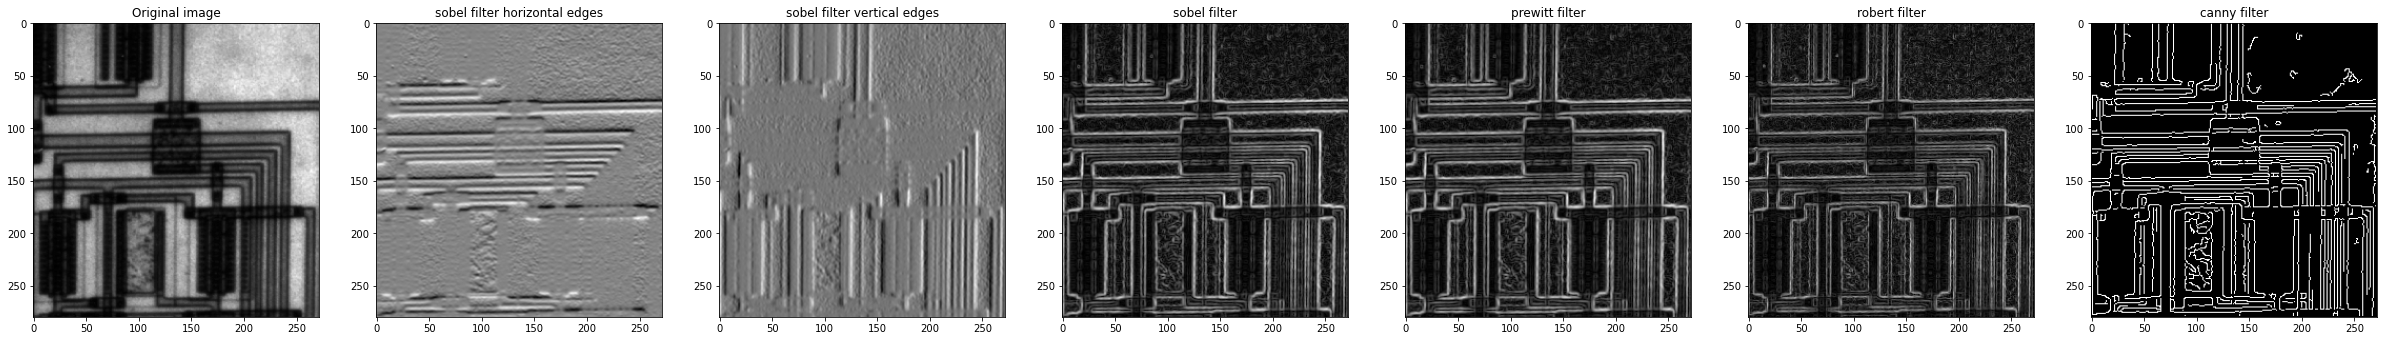

In [50]:
# 1. Built-in Sobel, Prewill, Roberts

img = io.imread('circuit.tif')

sobelH_Image = sobel_h(img)
sobelV_Image = sobel_v(img)
sobel_Image = sobel(img)
prewitt_Image = prewitt(img)
roberts_Image = roberts(img)
canny_Image = canny(img)


show_images(images=[img,sobelH_Image,sobelV_Image,sobel_Image,prewitt_Image,roberts_Image,canny_Image],
            titles=["Original image","sobel filter horizontal edges","sobel filter vertical edges","sobel filter","prewitt filter","robert filter","canny filter"])

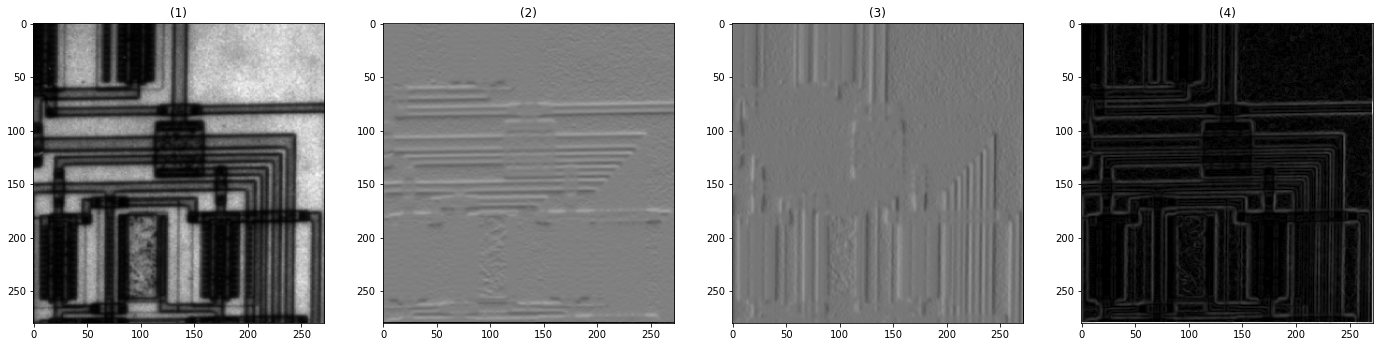

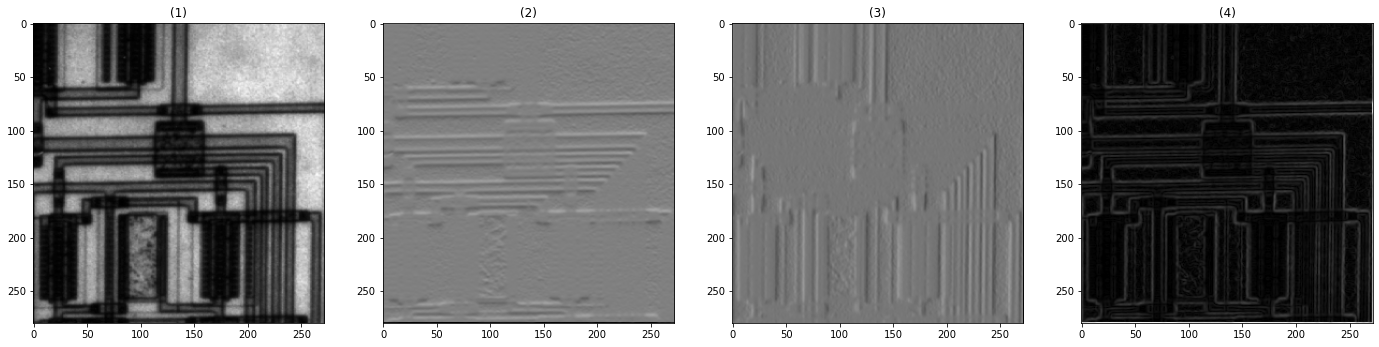

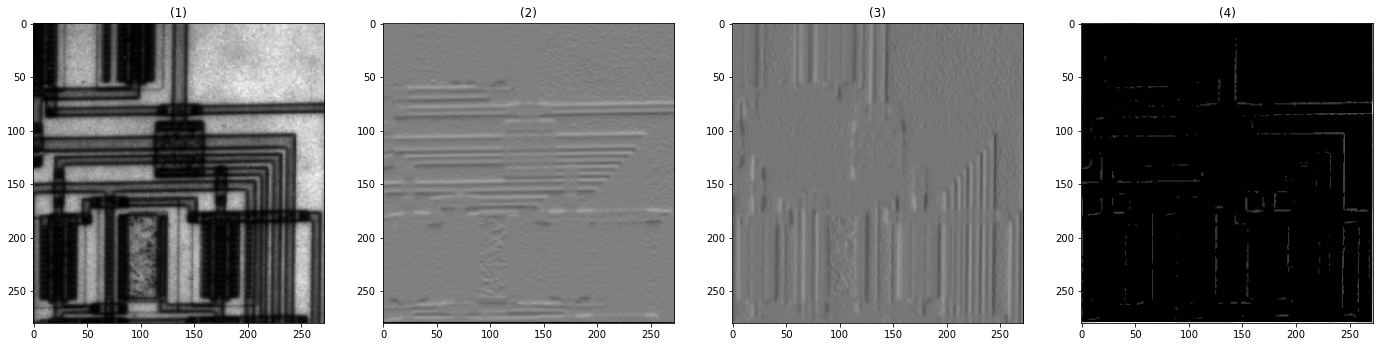

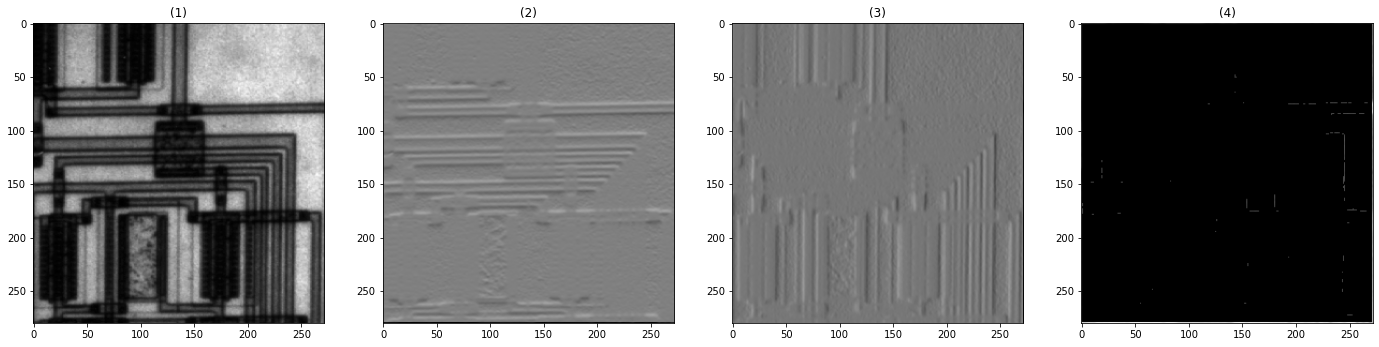

In [51]:
# 2. Custom Sobel (V-H-Both)
def CustomSobel(image,Threshold=20,window_width=3, window_height=3):
    x_temp_img = np.pad(image*255, (1, 1), 'constant', constant_values=(0))
    y_temp_img = np.pad(image*255, (1, 1), 'constant', constant_values=(0))
    x_edges_img = np.zeros(image.shape)
    y_edges_img = np.zeros(image.shape)
    xy_edges_img = np.zeros(image.shape)
    
    hx = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ])       
    hy = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x_edges_img[i][j] = np.sum(x_temp_img[i:i+3,j:j+3]*hx)
            y_edges_img[i][j] = np.sum(y_temp_img[i:i+3,j:j+3]*hy)
            
            
    xy_edges_img = np.sqrt(x_edges_img**2 + y_edges_img**2)
    xy_edges_img[xy_edges_img<Threshold]=0
    
    return x_edges_img/255,y_edges_img/255,xy_edges_img/255
    



img = io.imread('circuit.tif')
x,y,xy=CustomSobel(image=img)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=10)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=200)
show_images(images=[img,x,y,xy])

x,y,xy=CustomSobel(image=img,Threshold=250)
show_images(images=[img,x,y,xy])

[[ 15.2011394   15.00858072  14.85527939 ... 146.79412787 145.80968448
  145.45836835]
 [ 15.40744934  15.1329769   14.91278383 ... 146.13677411 146.04927997
  146.57327255]
 [ 15.60796306  15.25983223  14.98068831 ... 146.05193191 146.74301072
  147.96543016]
 ...
 [ 45.81677458  53.29465756  60.44095507 ...  71.46653635  71.03572377
   68.02886527]
 [ 41.26385213  47.32278966  52.85544614 ...  72.07858072  71.45424278
   68.33633155]
 [ 37.48763545  42.42779642  46.74734748 ...  72.51407352  71.71282596
   68.51351055]] 

[[ 7.60601083e+01  4.45590169e+01  4.41088822e+01 ...  4.41373713e+02
   4.35465653e+02  7.25234710e+02]
 [ 4.70491024e+01 -1.69901052e-01 -4.98174569e-01 ... -3.43613258e+00
  -3.13836039e+00  4.40560407e+02]
 [ 4.80532670e+01  3.06887559e-02 -3.86954998e-01 ... -4.14832422e+00
  -2.87510032e+00  4.46980524e+02]
 ...
 [ 1.15235121e+02  1.22908065e+00  7.37809725e+00 ...  1.20829178e+01
   7.90030807e+00  1.95156830e+02]
 [ 1.03761163e+02 -1.75214754e+00  2.63703148

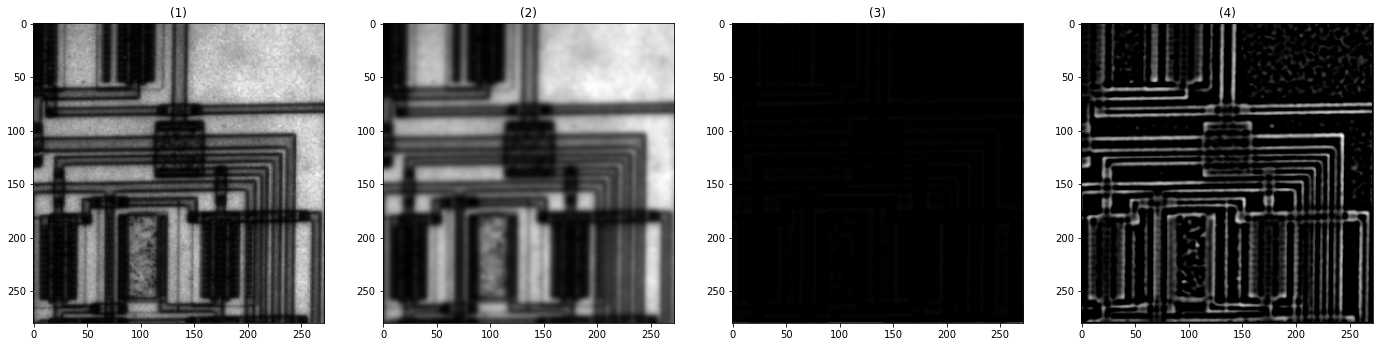

In [46]:
# 3. Custom LoG
def CustomLoG(image,Threshold=20,window_width=3, window_height=3):
    F1 = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ])   
    F2 = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])


    F1_temp_img = np.pad(image*255, (1, 1), 'constant', constant_values=(0))
    F2_temp_img = np.pad(image*255, (1, 1), 'constant', constant_values=(0))
    F1_img = np.zeros(image.shape)
    F2_img = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            F1_img[i][j] = np.sum(F1_temp_img[i:i+3,j:j+3]*F1)
            F2_img[i][j] = np.sum(F2_temp_img[i:i+3,j:j+3]*F2)

    F1_img[F1_img<Threshold]=0
    F2_img[F2_img<Threshold]=0
    return F1_img/255,F2_img/255


img = io.imread('circuit.tif')
filtteredimg = gaussian(img, sigma=1.8)

f1,f2 = CustomLoG(image=filtteredimg,Threshold=0)
show_images(images=[img,filtteredimg,f1,f2])

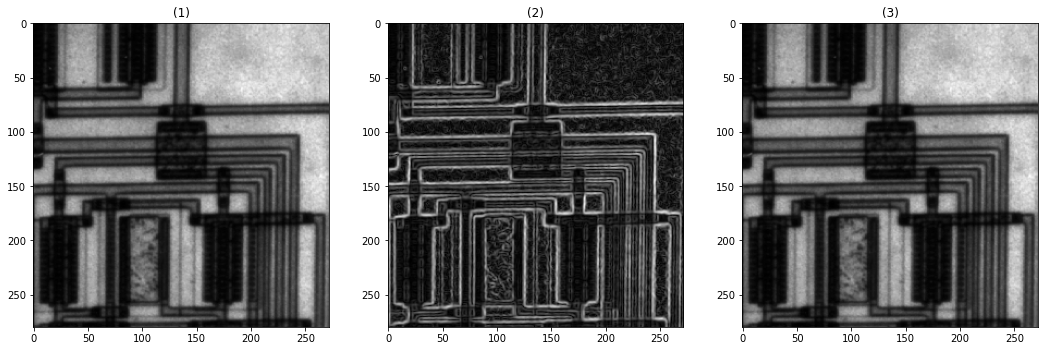

In [6]:

'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

factoredImage = sobel_Image * 0.3
show_images(images=[img,sobel_Image,img-factoredImage])

In [7]:
a = np.arange(9.0).reshape(3,3)


F1 = np.array([
    [-1, -1, -1],
    [-3,  8, -1],
    [-1, -1, -1]
])


anew = a
aneww = np.pad(a, (1, 1), 'constant', constant_values=(0))
print( anew )
print('\n')
print( aneww )
print('\n')

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        anew[i,j] = np.sum(aneww[i:i+3,j:j+3]*F1, dtype=np.int32)
print( anew[0:a.shape[0],0:a.shape[1]] )


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


[[0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 0.]
 [0. 3. 4. 5. 0.]
 [0. 6. 7. 8. 0.]
 [0. 0. 0. 0. 0.]]


[[-8. -6.  4.]
 [ 6. -6. 10.]
 [34. 18. 34.]]
